In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv("datas/CRM analysis/accounts.csv")
dd = pd.read_csv("datas/CRM analysis/data_dictionary.csv")
prod = pd.read_csv("datas/CRM analysis/products.csv")
sp = pd.read_csv("datas/CRM analysis/sales_pipeline.csv")
st = pd.read_csv("datas/CRM analysis/sales_teams.csv")


In [18]:
print("Accounts Dataset:")
print(ds.info())
print(ds.head())

print("\nData Dictionary Dataset:")
print(dd.info())
print(dd.head())

print("\nProducts Dataset:")
print(prod.info())
print(prod.head())

print("\nSales Pipeline Dataset:")
print(sp.info())
print(sp.head())

print("\nSales Teams Dataset:")
print(st.info())
print(st.head())

Accounts Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB
None
            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical

In [19]:
ds_null_sum = ds.isnull().sum()
dd_null_sum = dd.isnull().sum()
prod_null_sum = prod.isnull().sum()
sp_null_sum = sp.isnull().sum()
st_null_sum = st.isnull().sum()

print("Null Sums for Accounts Dataset:")
print(ds_null_sum)

print("\nNull Sums for Data Dictionary Dataset:")
print(dd_null_sum)

print("\nNull Sums for Products Dataset:")
print(prod_null_sum)

print("\nNull Sums for Sales Pipeline Dataset:")
print(sp_null_sum)

print("\nNull Sums for Sales Teams Dataset:")
print(st_null_sum)

Null Sums for Accounts Dataset:
account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

Null Sums for Data Dictionary Dataset:
Table          0
Field          0
Description    0
dtype: int64

Null Sums for Products Dataset:
product        0
series         0
sales_price    0
dtype: int64

Null Sums for Sales Pipeline Dataset:
opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

Null Sums for Sales Teams Dataset:
sales_agent        0
manager            0
regional_office    0
dtype: int64


In [20]:
ds['subsidiary_of'] = ds['subsidiary_of'].fillna('Unknown')

sp['account'] = sp['account'].fillna('Unknown')
sp['engage_date'] = sp['engage_date'].fillna('Unknown')
sp['close_date'] = sp['close_date'].fillna('Unknown')
sp['close_value'] = sp['close_value'].fillna(0)

acc_null_sum = ds.isnull().sum()
sp_null_sum = sp.isnull().sum()

# Print null sums
print("Null Sums for Accounts Dataset:")
print(acc_null_sum)

print("\nNull Sums for Sales Pipeline Dataset:")
print(sp_null_sum)

Null Sums for Accounts Dataset:
account             0
sector              0
year_established    0
revenue             0
employees           0
office_location     0
subsidiary_of       0
dtype: int64

Null Sums for Sales Pipeline Dataset:
opportunity_id    0
sales_agent       0
product           0
account           0
deal_stage        0
engage_date       0
close_date        0
close_value       0
dtype: int64


In [21]:
ds = ds.drop_duplicates()
dd = dd.drop_duplicates()
prod = prod.drop_duplicates()
sp = sp.drop_duplicates()
st = st.drop_duplicates()

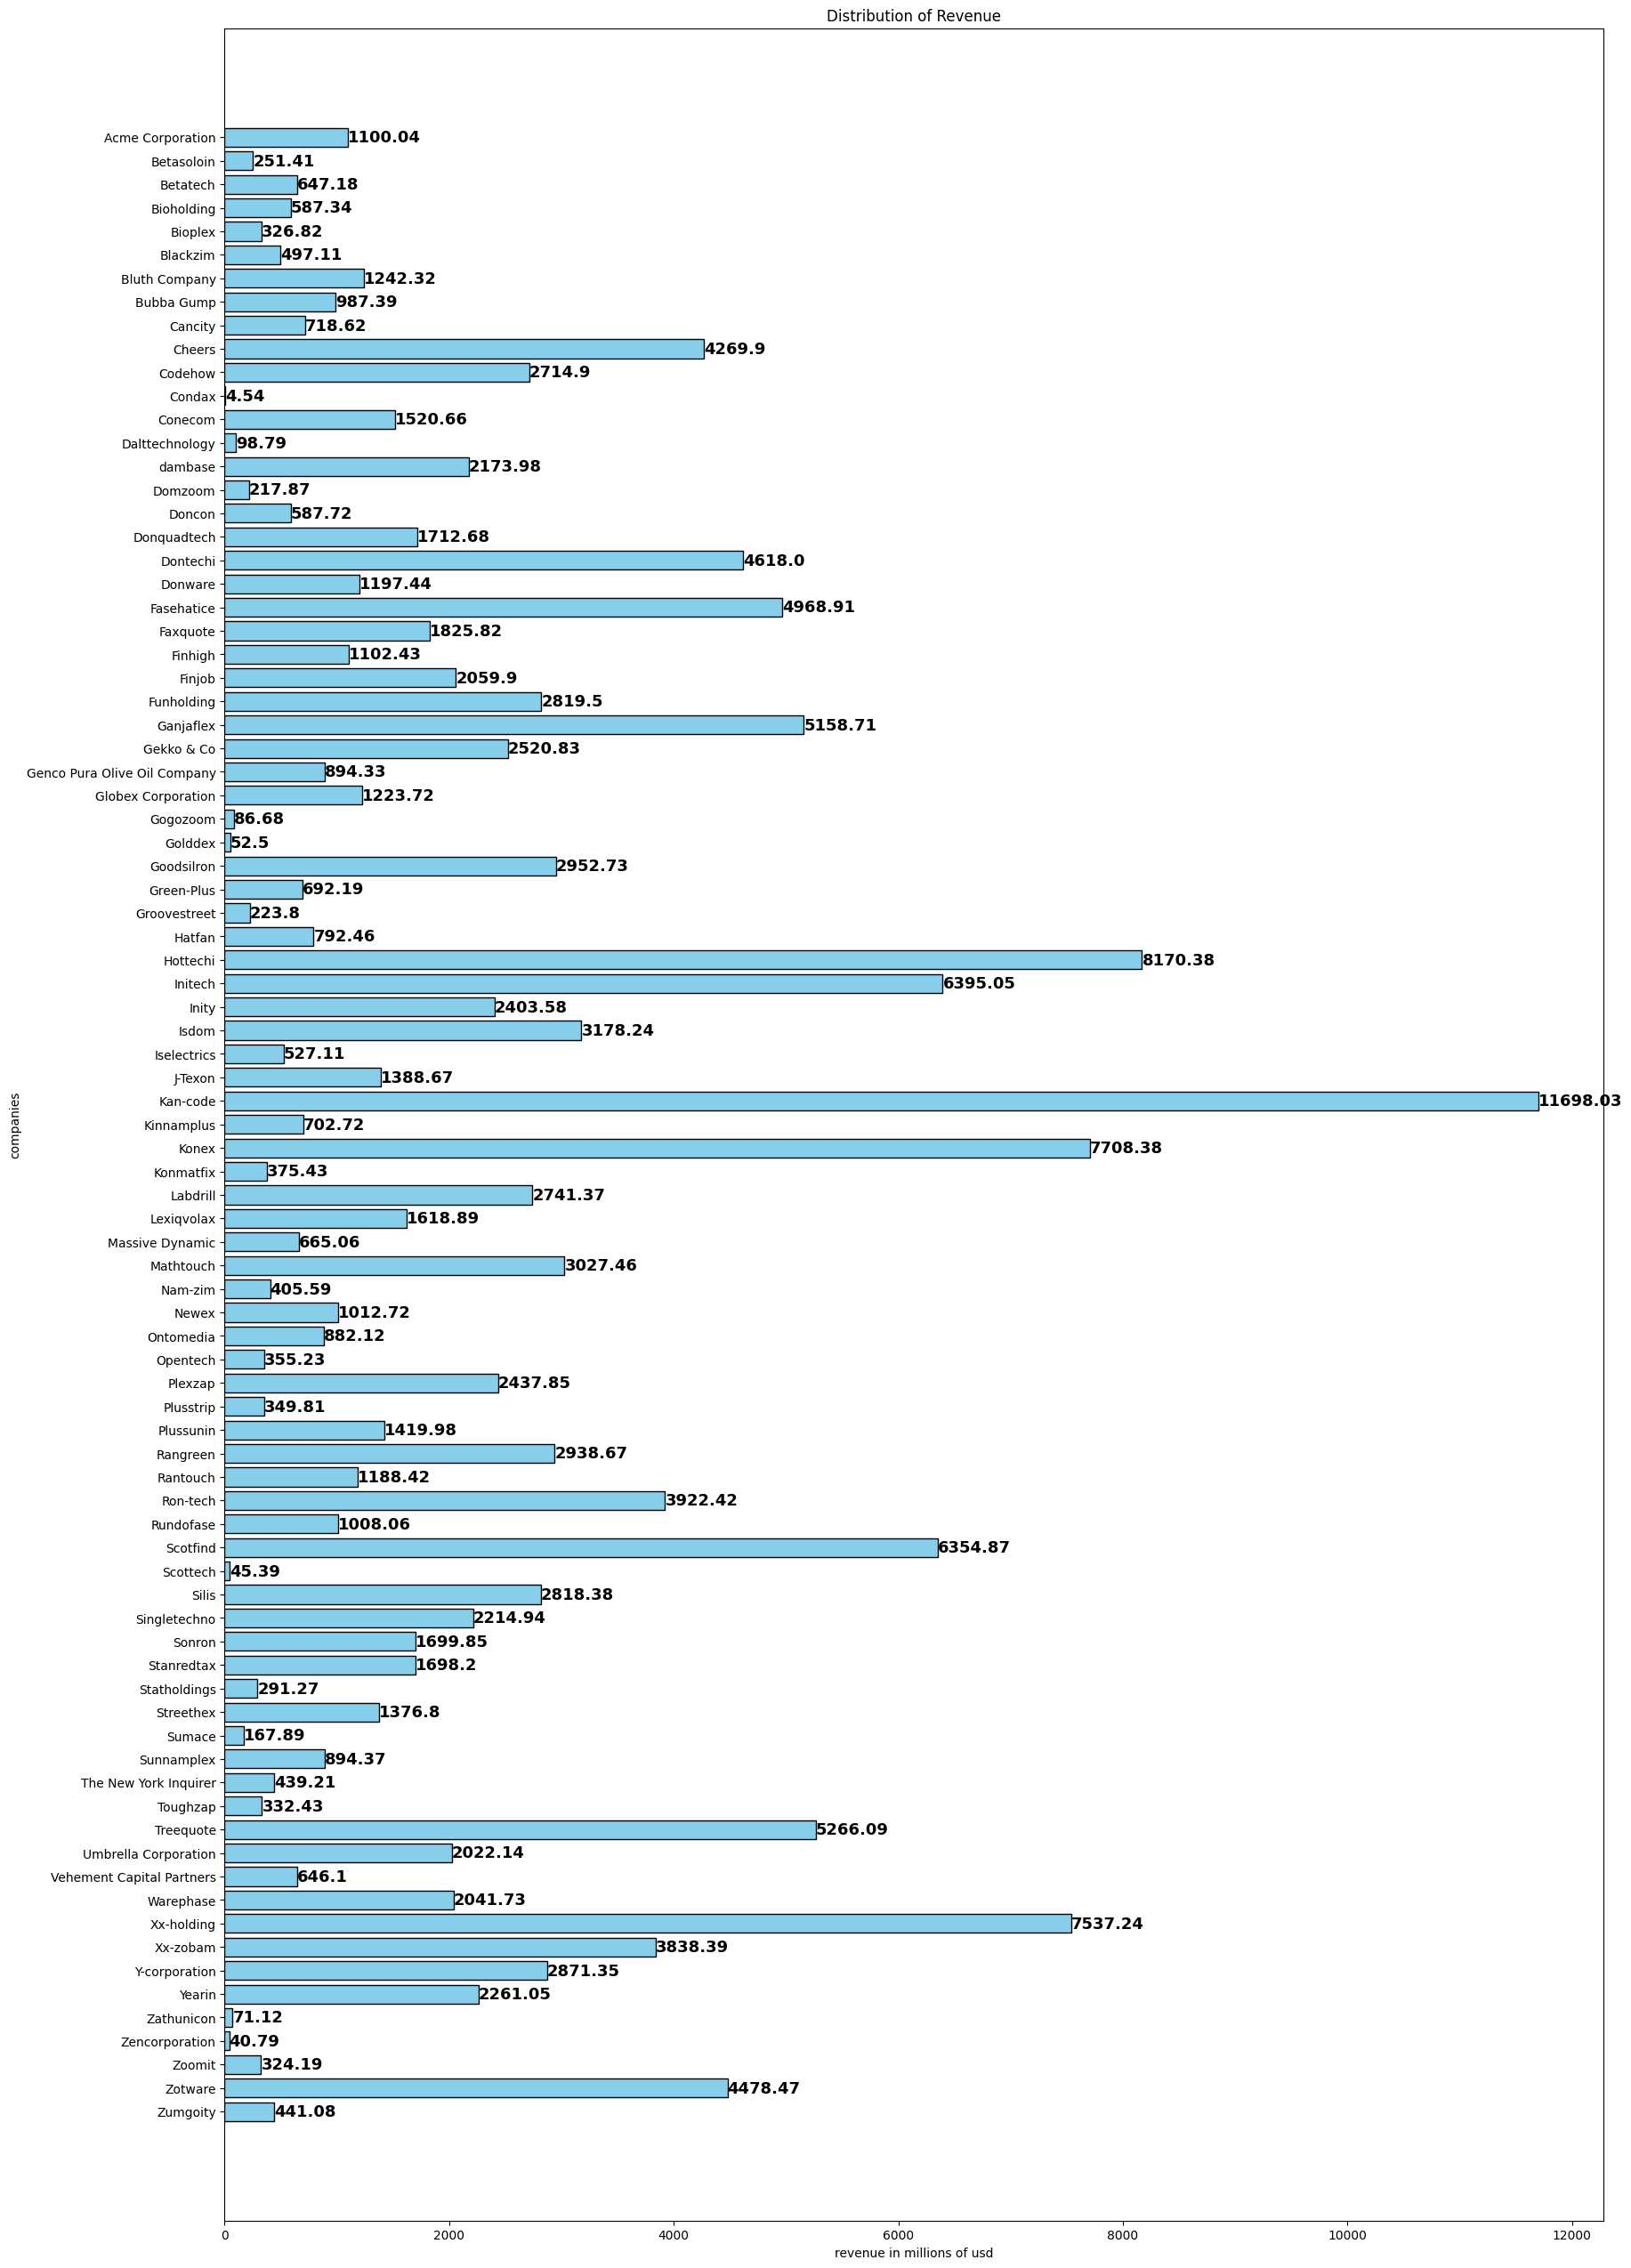

In [22]:
plt.figure(figsize=(20, 32))
values = ds['revenue']
bar = plt.barh(ds['account'], values, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.ylabel('companies')
plt.xlabel('revenue in millions of usd')
plt.gca().invert_yaxis()
for index, value in enumerate(values):
    plt.text(value, index+0.2, str(value), fontsize = 13, fontweight ='bold')
plt.show()

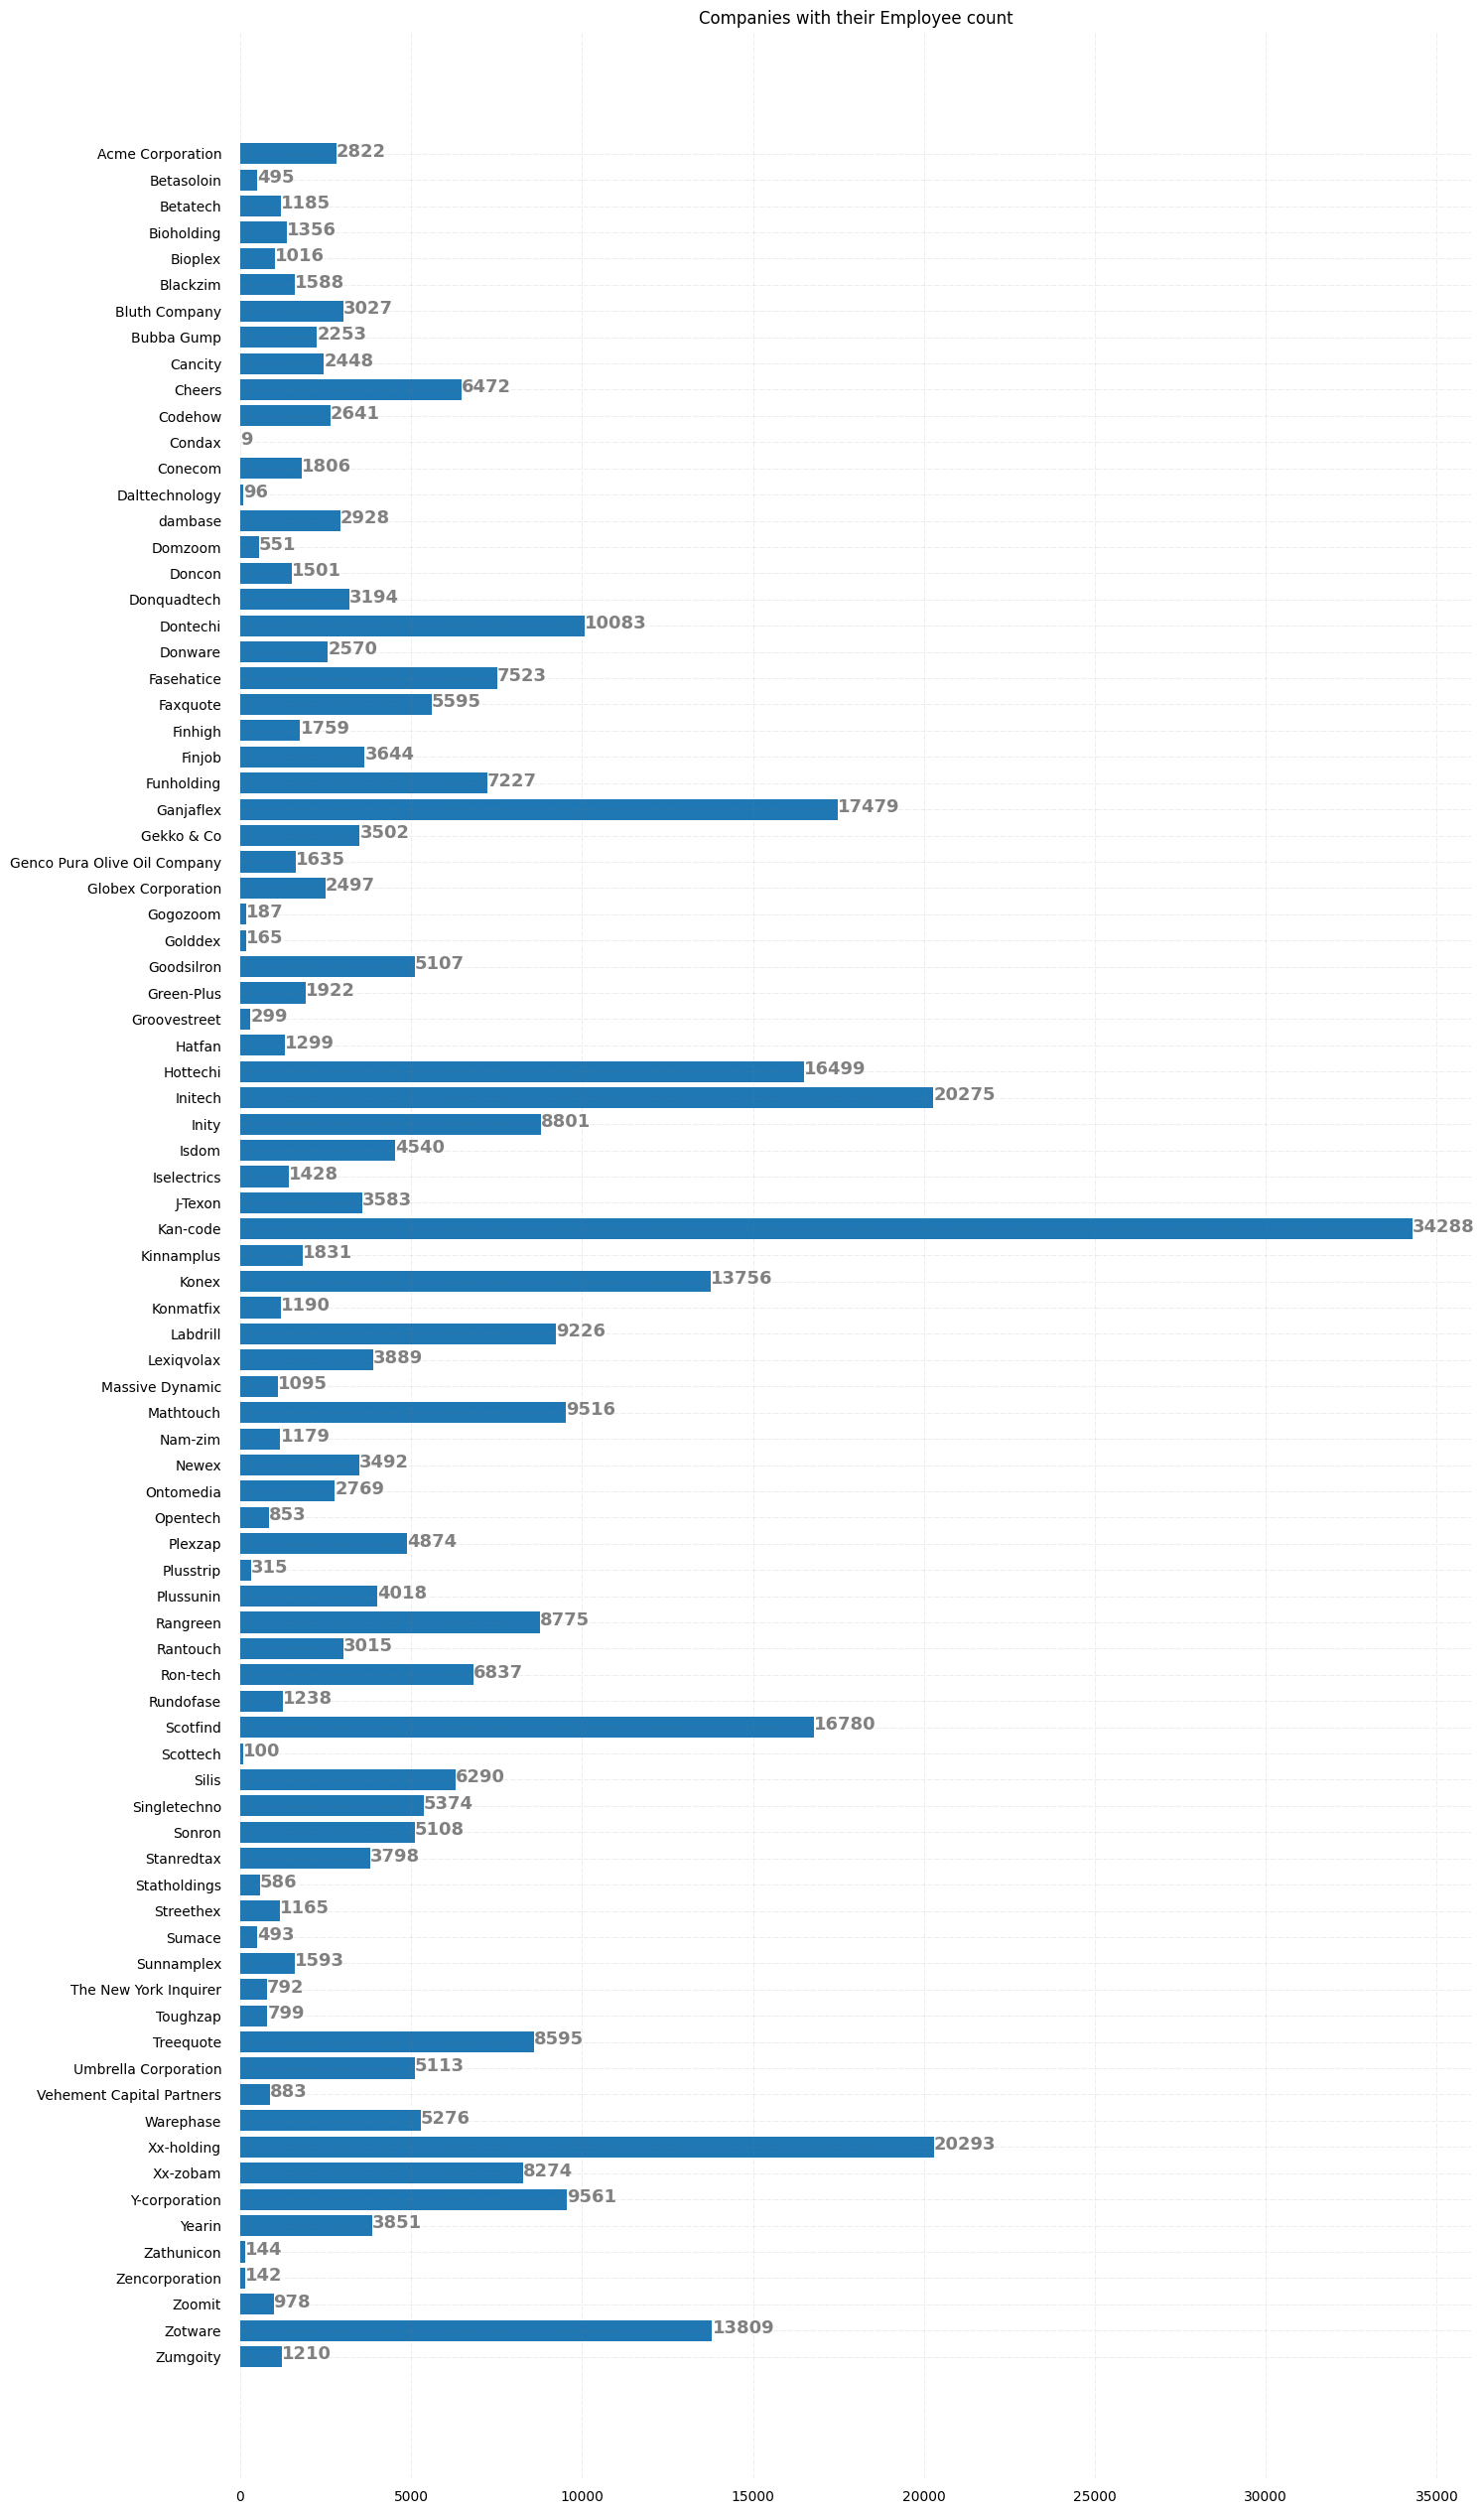

In [23]:
companies = ds['account']
employees = ds['employees']
fig, ax = plt.subplots(figsize =(16, 32))
ax.barh(companies, employees)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.3, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 13, fontweight ='bold',
             color ='grey')
ax.set_title('Companies with their Employee count',
             loc ='center', )
plt.show()



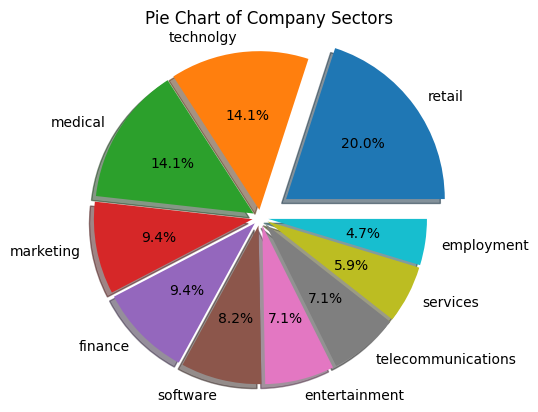

In [24]:

sector_count = ds["sector"].value_counts()
plt.pie(sector_count,labels=sector_count.index,autopct='%0.01f%%',shadow=True,explode=[.2,.05,.05,.05,.05,.05,.05,.05,.05,.05])
plt.title('Pie Chart of Company Sectors')
plt.axis('equal')
plt.show()

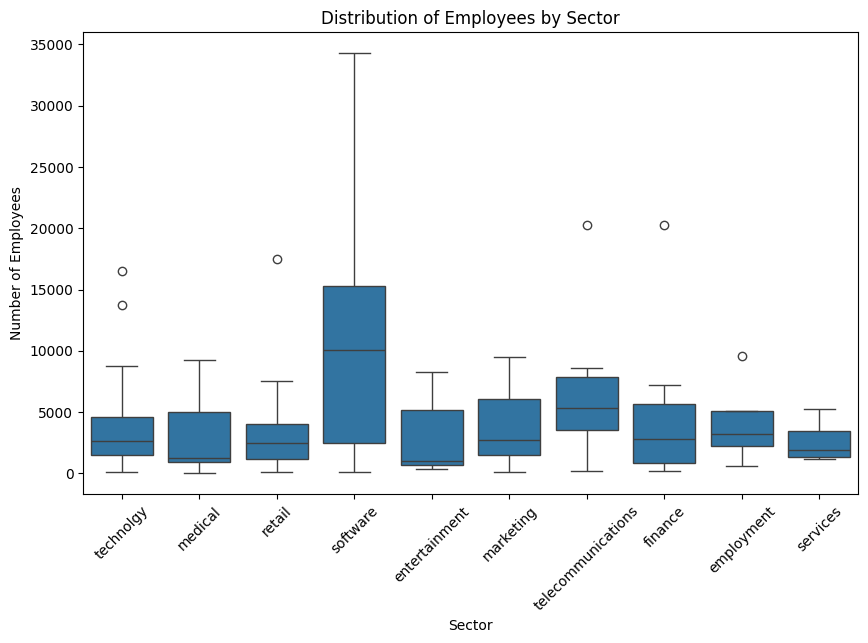

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sector', y='employees', data=ds)
plt.title('Distribution of Employees by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

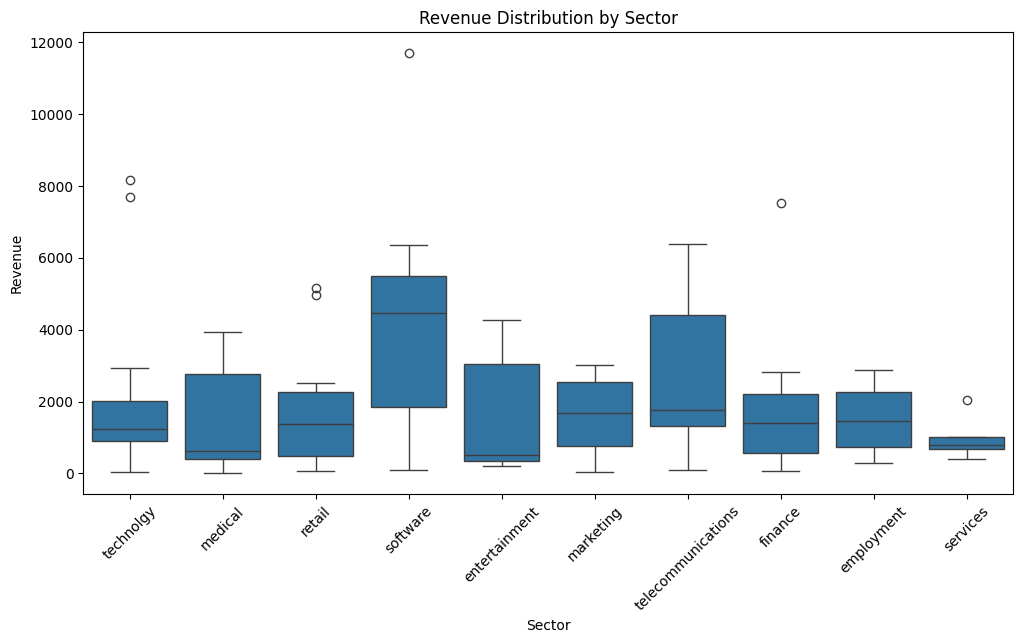

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sector', y='revenue', data=ds)
plt.title('Revenue Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

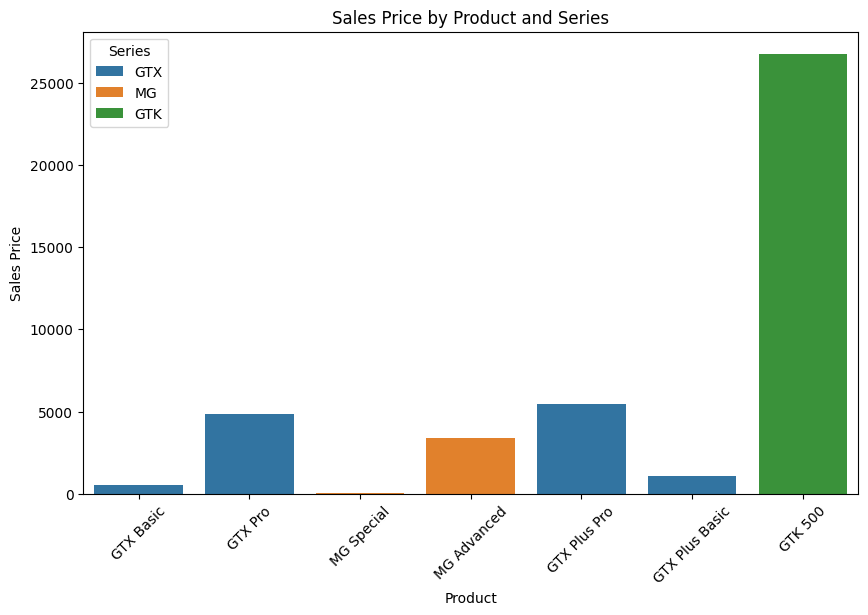

In [27]:
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='product', y='sales_price', hue='series', data=prod)
plt.title('Sales Price by Product and Series')
plt.xlabel('Product')
plt.ylabel('Sales Price')
plt.xticks(rotation=45)
plt.legend(title='Series')
plt.show()

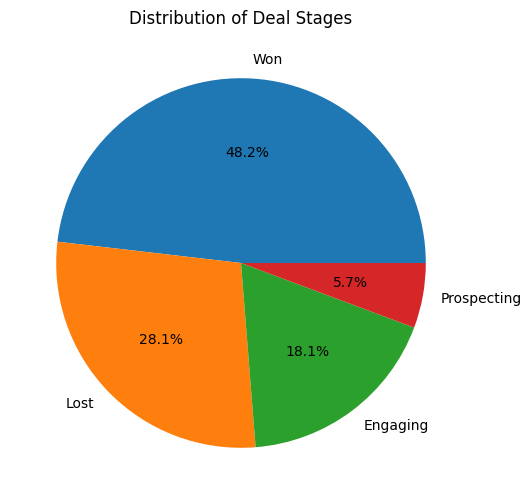

In [28]:
plt.figure(figsize=(10, 6))
sp['deal_stage'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Deal Stages')
plt.ylabel('')
plt.show()

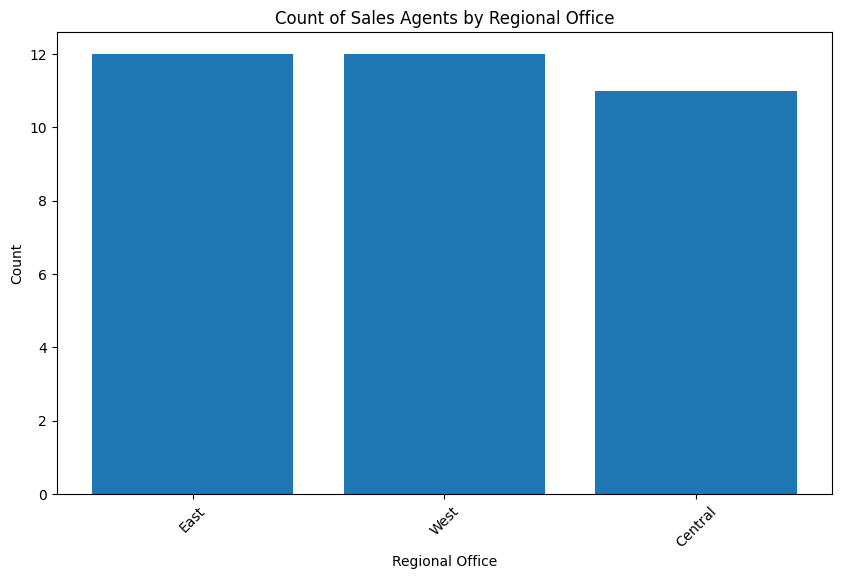

In [29]:
plt.figure(figsize=(10,6))
plt.bar(st['regional_office'].value_counts().index, st['regional_office'].value_counts())
plt.title('Count of Sales Agents by Regional Office')
plt.xlabel('Regional Office')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


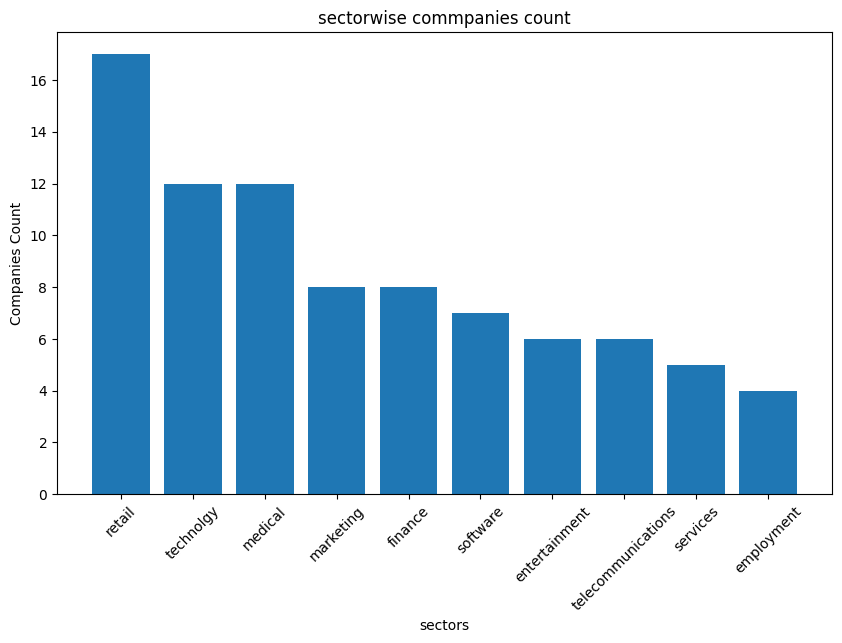

In [30]:
plt.figure(figsize=(10,6))
plt.bar(ds['sector'].value_counts().index, ds['sector'].value_counts())
plt.title('sectorwise commpanies count')
plt.xlabel('sectors')
plt.ylabel('Companies Count')
plt.xticks(rotation=45)
plt.show()

In [31]:
print(st.to_string())

           sales_agent           manager regional_office
0        Anna Snelling  Dustin Brinkmann         Central
1       Cecily Lampkin  Dustin Brinkmann         Central
2    Versie Hillebrand  Dustin Brinkmann         Central
3      Lajuana Vencill  Dustin Brinkmann         Central
4          Moses Frase  Dustin Brinkmann         Central
5   Jonathan Berthelot     Melvin Marxen         Central
6    Marty Freudenburg     Melvin Marxen         Central
7     Gladys Colclough     Melvin Marxen         Central
8      Niesha Huffines     Melvin Marxen         Central
9      Darcel Schlecht     Melvin Marxen         Central
10       Mei-Mei Johns     Melvin Marxen         Central
11    Violet Mclelland        Cara Losch            East
12       Corliss Cosme        Cara Losch            East
13  Rosie Papadopoulos        Cara Losch            East
14       Garret Kinder        Cara Losch            East
15      Wilburn Farren        Cara Losch            East
16  Elizabeth Anderson        C

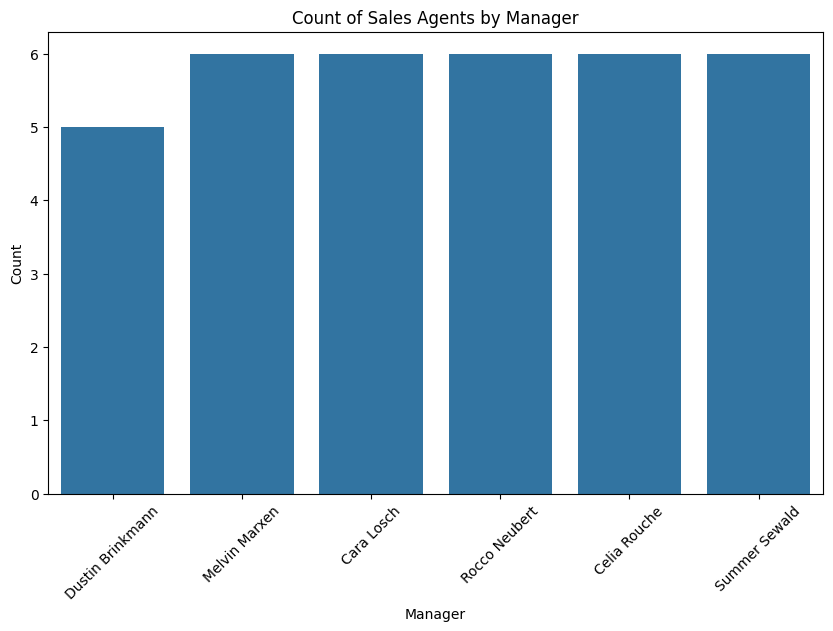

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='manager', data=st)
plt.title('Count of Sales Agents by Manager')
plt.xlabel('Manager')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()